# 中级应用统计复习提纲

## 参考题

1. 设$X$服从$\mu^{\prime}=[-3,1,4]$和

$$\Sigma=\left[\begin{array}{rrr}{1} & {-2} & {0} \\ {-2} & {5} & {0} \\ {0} & {0} & {2}\end{array}\right]$$

的$N_{3}(\mu, \Sigma)$，下列各对随机变量中哪几数对相互独立？请解释

- $X_{1}$和$X_{2}$

- $X_{2}$和$X_{3}$

- $\frac{X_{1}+X_{2}}{2}$和$X_{3}$

- $X_{2}$和$X_{2}-\frac{5}{2} X_{1}-X_{3}$

2. 霍特林$T^{2}$统计量

In [28]:
library(rio)
library(ICSNP)

data <- import("C:/Sheldon/Geeker/jupiter/Notebook/Course/Applied Statistics/Data/T5-1.DAT")
colnames(data) <- c("x1", "x2", "x3")
data

Unrecognized file format. Try specifying with the format argument.

Ambiguous file format ('.dat'), but attempting 'data.table::fread("C:/Sheldon/Geeker/jupiter/Notebook/Course/Applied Statistics/Data/T5-1.DAT")'



x1,x2,x3
<dbl>,<dbl>,<dbl>
3.7,48.5,9.3
5.7,65.1,8.0
3.8,47.2,10.9
3.2,53.2,12.0
3.1,55.5,9.7
4.6,36.1,7.9
2.4,24.8,14.0
7.2,33.1,7.6
6.7,47.4,8.5


In [2]:
HotellingsT2(data, mu = c(4,50,10), test = "chi")


	Hotelling's one sample T2-test

data:  data
T.2 = 9.7388, df = 3, p-value = 0.02092
alternative hypothesis: true location is not equal to c(4,50,10)


In [3]:
set.seed(123456)
X <- rmvnorm(10, c(0, 0, 0, 0), diag(1:4))
Y <- rmvnorm(10, c(0.5, 0.5, 0.5, 0.5), diag(1:4))
Z <- rbind(X, Y)
print(X)
print(Y)

             [,1]       [,2]        [,3]       [,4]
 [1,]  0.83373317 -0.3903905 -0.61488122  0.1749748
 [2,]  2.25225573  1.1801048  2.27317034  5.0052908
 [3,]  1.16823174 -0.6026891 -1.72534734 -2.2278998
 [4,] -0.05573154  1.6608982  1.82422814  0.1152119
 [5,] -0.73504289  1.3159659  2.88942616  1.1193758
 [6,] -0.75397477  1.7770360  0.06667105  0.3790797
 [7,]  0.46259495 -0.6043826  0.02872780  1.4097582
 [8,]  0.97184932 -0.8775076 -1.48240512  0.1391167
 [9,] -1.04619827 -3.8874869 -1.95697425 -1.7233695
[10,]  1.56007385  1.4355517  1.80825139 -2.2318104
             [,1]       [,2]        [,3]       [,4]
 [1,] -0.57130450  1.8687055  0.79623707 -1.2925006
 [2,]  0.65828925 -0.2098623 -1.17302705  0.2725317
 [3,]  1.58594981 -1.2135294 -2.56178443 -0.4833842
 [4,]  0.82146587  2.5656863  3.16258232 -0.1791371
 [5,] -0.57744874 -1.6082604  0.06222988  0.2561550
 [6,] -0.14898337  0.9427560  0.71271414 -1.1736808
 [7,]  1.10042174  0.1521959  0.18015145  0.5463135
 [8,]  0.015

In [4]:
HotellingsT2(X, Y)


	Hotelling's two sample T2-test

data:  X and Y
T.2 = 0.27225, df1 = 4, df2 = 15, p-value = 0.8913
alternative hypothesis: true location difference is not equal to c(0,0,0,0)


3. 回归分析与方差分析

In [16]:
data <- import("C:/Sheldon/Geeker/jupiter/Notebook/Course/Applied Statistics/Data/wage1.dta")
print(colnames(data))
data$group <- 1
data$group[data$singfem==1] <- 2
data$group[data$marrmale==1] <- 3
data$group[data$marrfem==1] <- 4
data$group <- factor(data$group)
print(dim(data))

 [1] "wage"     "educ"     "exper"    "tenure"   "nonwhite" "female"  
 [7] "married"  "numdep"   "smsa"     "northcen" "south"    "west"    
[13] "construc" "ndurman"  "trcommpu" "trade"    "services" "profserv"
[19] "profocc"  "clerocc"  "servocc"  "lwage"    "expersq"  "tenursq" 
[25] "male"     "single"   "marrmale" "marrfem"  "singfem"  "singmale"
[1] 526  31


In [6]:
aov_object <- aov(wage ~ group, data)
summary(aov_object)

             Df Sum Sq Mean Sq F value Pr(>F)    
group         3   1296   432.0   38.45 <2e-16 ***
Residuals   522   5864    11.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [7]:
summary(lm(wage~group,data))


Call:
lm(formula = wage ~ group, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7530 -1.7327 -0.9973  1.2566 17.0184 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.1680     0.3614  14.299  < 2e-16 ***
group2       -0.5564     0.4736  -1.175    0.241    
group3        2.8150     0.4363   6.451 2.53e-10 ***
group4       -0.6021     0.4645  -1.296    0.195    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.352 on 522 degrees of freedom
Multiple R-squared:  0.181,	Adjusted R-squared:  0.1763 
F-statistic: 38.45 on 3 and 522 DF,  p-value: < 2.2e-16


多元方差分析（MANOVA）

In [22]:
my_data <- iris
sepl <- iris$Sepal.Length
petl <- iris$Petal.Length
# MANOVA test
res.man <- manova(cbind(Sepal.Length, Petal.Length) ~ Species, data = iris)
summary(res.man, test="Wilks")

           Df    Wilks approx F num Df den Df    Pr(>F)    
Species     2 0.039878   292.56      4    292 < 2.2e-16 ***
Residuals 147                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [26]:
y1 <- c(9,6,9,0,2,3,1,2)
y2 <- c(3,2,7,4,0,8,9,7)
g <- factor(c(1,1,1,2,2,3,3,3))
# MANOVA test
manova_result <- manova(cbind(y1, y2) ~ g)
summary(manova_result, test="Wilks")

          Df    Wilks approx F num Df den Df   Pr(>F)   
g          2 0.038455   8.1989      4      8 0.006234 **
Residuals  5                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

4. 聚类分析

<img src="./pic/cluster14.png" width = 40% height = 40% />

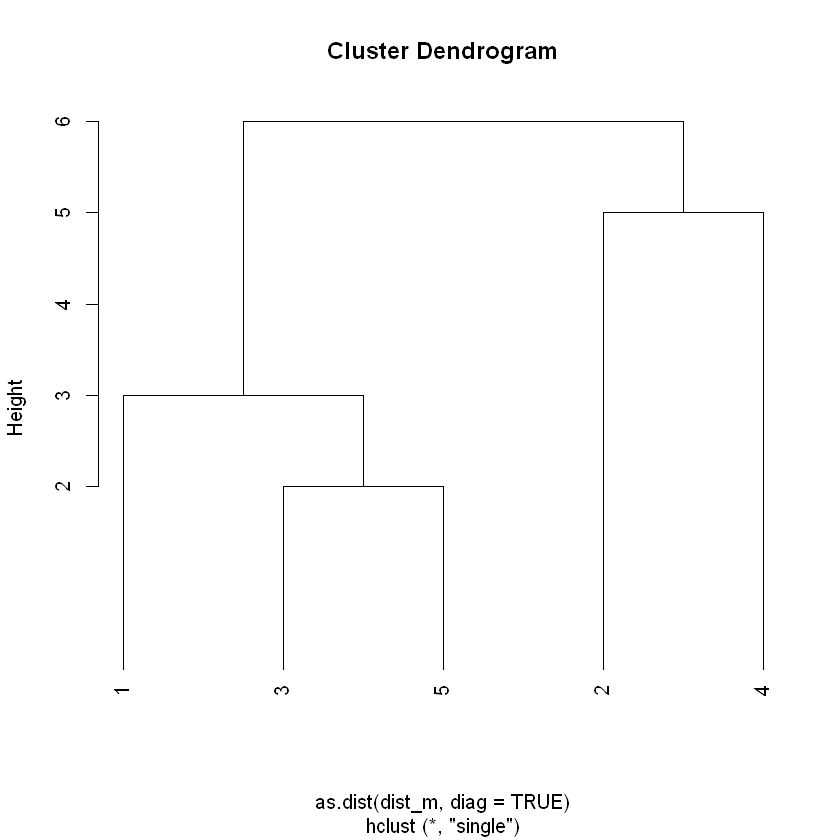

In [50]:
dist_m <- matrix(c(0,9,3,6,11,9,0,7,5,10,3,7,0,9,2,6,5,9,0,8,11,10,2,8,0),nrow=5)
rownames(dist_m) <- c(1,2,3,4,5)
colnames(dist_m) <- c(1,2,3,4,5)

hc <- hclust(as.dist(dist_m,diag=TRUE), "single")
plot(hc,hang = -1)

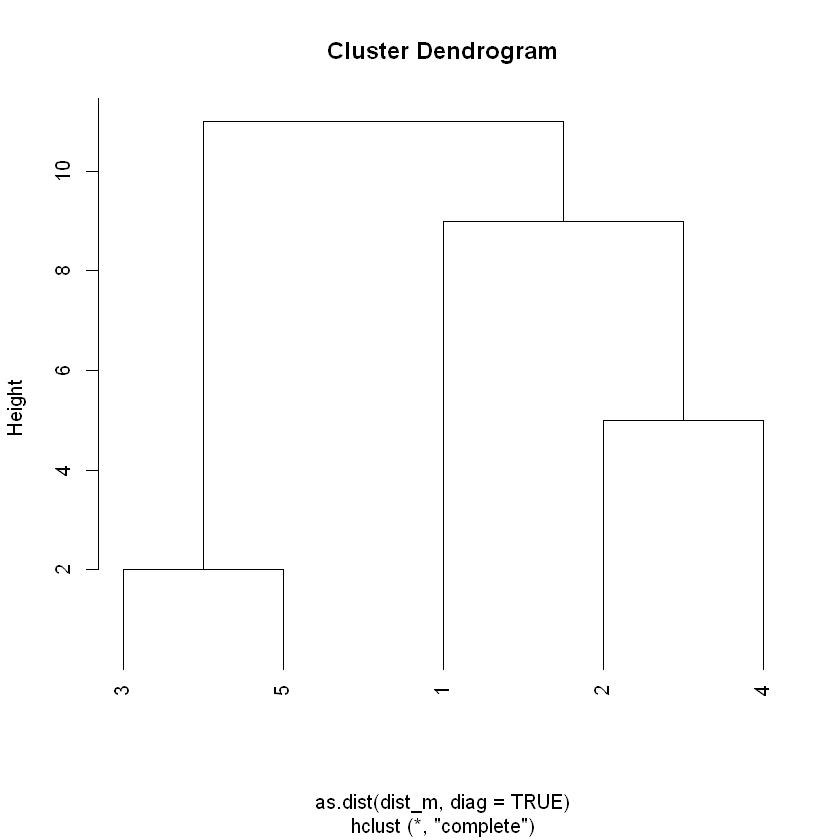

In [51]:
hc <- hclust(as.dist(dist_m,diag=TRUE), "complete")
plot(hc,hang = -1)

$K$均值法聚类

$$
\begin{array}{c|cc}{\text { Item }} & {x_{1}} & {x_{2}} \\ \hline \mathrm{A} & {5} & {3} \\ {\mathrm{B}} & {-1} & {1} \\ {\mathrm{C}} & {1} & {-2} \\ {\mathrm{D}} & {-3} & {-2}\end{array}
$$


In [66]:
x <- matrix(c(5,3,-1,1,1,-2,-3,-2),nrow=4)
colnames(x) <- c("x1", "x2")
rownames(x) <- c("A", "B", "C", "D")

(cl <- kmeans(x, 2))

K-means clustering with 2 clusters of sizes 3, 1

Cluster means:
  x1        x2
1  1 -2.333333
2  5  1.000000

Clustering vector:
A B C D 
2 1 1 1 

Within cluster sum of squares by cluster:
[1] 8.666667 0.000000
 (between_SS / total_SS =  70.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

5. 主成分分析

In [98]:
data <- import("C:/Sheldon/Geeker/jupiter/Notebook/Course/Applied Statistics/Data/T8-5.DAT")
colnames(data) <- c("x1", "x2", "x3", "x4", "x5")
data

Unrecognized file format. Try specifying with the format argument.

Ambiguous file format ('.dat'), but attempting 'data.table::fread("C:/Sheldon/Geeker/jupiter/Notebook/Course/Applied Statistics/Data/T8-5.DAT")'



x1,x2,x3,x4,x5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.67,5.71,69.02,30.3,1.48
2.25,4.37,72.98,43.3,1.44
3.12,10.27,64.94,32.0,2.11
5.14,7.44,71.29,24.5,1.85
5.54,9.25,74.94,31.0,2.23
5.04,4.84,53.61,48.2,1.60
3.14,4.82,67.00,37.6,1.52
2.43,2.40,67.20,36.8,1.40
5.38,4.30,83.03,19.7,2.07


In [105]:
#PCA_result <- prcomp(data)
PCA_result <- prcomp(data, center=TRUE, scale=TRUE)
PCA_sum <- summary(PCA_result)
print(PCA_sum$importance)

                            PC1      PC2       PC3       PC4       PC5
Standard deviation     1.411353 1.169413 0.9296006 0.7314787 0.4912604
Proportion of Variance 0.398380 0.273510 0.1728300 0.1070100 0.0482700
Cumulative Proportion  0.398380 0.671890 0.8447200 0.9517300 1.0000000


In [106]:
print(PCA_sum$rotation)

          PC1        PC2         PC3        PC4        PC5
x1  0.2625829 -0.4629936  0.78390268 -0.2169291  0.2347882
x2 -0.5933541 -0.3256442 -0.16407255  0.1446471  0.7028828
x3  0.3256978 -0.6051419 -0.22487455  0.6628689 -0.1943206
x4 -0.4792022  0.2524850  0.55070086  0.5716730 -0.2766497
x5 -0.4932213 -0.4996473 -0.06882436 -0.4072024 -0.5801162


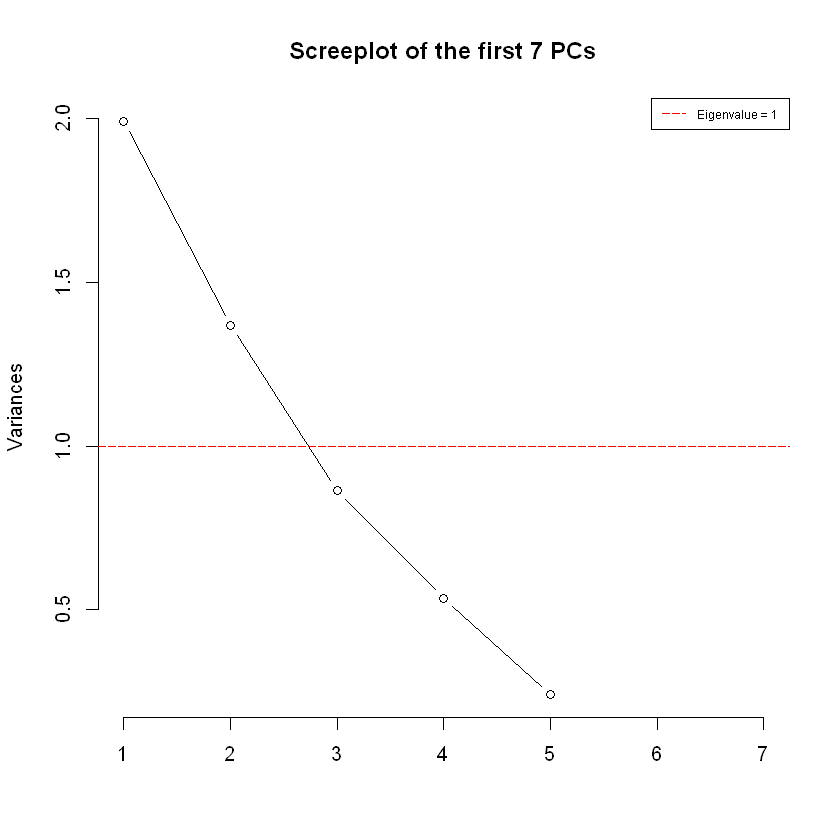

In [107]:
screeplot(PCA_result, type = "l", npcs = 7, main = "Screeplot of the first 7 PCs")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"), col=c("red"), lty=5, cex=0.6)

6. 因子分析

In [108]:
cor_mat <- matrix(c(1,0.02,0.96,0.42,0.01,0.02,1,0.13,0.71,0.85,0.96,0.13,1,0.5,0.11,0.42,0.71,0.50,1,0.79,0.01,0.85,0.11,0.79,1),nrow=5)
cor_mat

1.00,0.02,0.96,0.42,0.01
0.02,1.00,0.13,0.71,0.85
0.96,0.13,1.00,0.50,0.11
0.42,0.71,0.50,1.00,0.79
0.01,0.85,0.11,0.79,1.00


In [113]:
library(psych)

fa <- principal(cor_mat, nfactors=2, rotate="none", covar = TRUE)
fa

Principal Components Analysis
Call: principal(r = cor_mat, nfactors = 2, rotate = "none", covar = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
   PC1   PC2   h2    u2 com
1 0.56  0.82 0.98 0.021 1.8
2 0.78 -0.52 0.88 0.121 1.8
3 0.65  0.75 0.98 0.024 2.0
4 0.94 -0.10 0.89 0.107 1.0
5 0.80 -0.54 0.93 0.068 1.8

                       PC1  PC2
SS loadings           2.85 1.81
Proportion Var        0.57 0.36
Cumulative Var        0.57 0.93
Proportion Explained  0.61 0.39
Cumulative Proportion 0.61 1.00

Mean item complexity =  1.7
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.03 

Fit based upon off diagonal values = 1

In [114]:
fa <- principal(cor_mat, nfactors=2, rotate="varimax", covar = TRUE)
fa

Principal Components Analysis
Call: principal(r = cor_mat, nfactors = 2, rotate = "varimax", covar = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
   RC1   RC2   h2    u2 com
1 0.02  0.99 0.98 0.021 1.0
2 0.94 -0.01 0.88 0.121 1.0
3 0.13  0.98 0.98 0.024 1.0
4 0.84  0.43 0.89 0.107 1.5
5 0.97 -0.02 0.93 0.068 1.0

                       RC1  RC2
SS loadings           2.54 2.12
Proportion Var        0.51 0.42
Cumulative Var        0.51 0.93
Proportion Explained  0.54 0.46
Cumulative Proportion 0.54 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.03 

Fit based upon off diagonal values = 1

7. Logistic模型

In [119]:
library(rio)

data <- import("C:/Sheldon/Geeker/jupiter/Notebook/Course/Applied Statistics/Data/MROZ.DTA")
data$hsp <- factor(data$hsp)

reg_model <- lm(inlf ~ hsp, data = data)
summary(reg_model)


Call:
lm(formula = inlf ~ hsp, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6793 -0.5250  0.3207  0.4750  0.4750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.52495    0.02111  24.864  < 2e-16 ***
hsp1         0.15429    0.03979   3.878 0.000115 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4911 on 751 degrees of freedom
Multiple R-squared:  0.01963,	Adjusted R-squared:  0.01832 
F-statistic: 15.04 on 1 and 751 DF,  p-value: 0.0001147


In [120]:
logit_model <- glm(inlf ~ hsp, data = data, family = "binomial")
summary(logit_model)


Call:
glm(formula = inlf ~ hsp, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5080  -1.2201   0.8795   1.1353   1.1353  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.09990    0.08609   1.160 0.245911    
hsp1         0.65041    0.17048   3.815 0.000136 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1029.7  on 752  degrees of freedom
Residual deviance: 1014.7  on 751  degrees of freedom
AIC: 1018.7

Number of Fisher Scoring iterations: 4


对于$hsp = 1$的女性，模型是$\log \left(\frac{inlf_{hsp}}{1-inlf_{hsp}}\right)=\beta_{0}+\beta_{1}$；对于$hsp = 0$的女性，模型是$\log \left(\frac{inlf_{nohsp}}{1-inlf_{nohsp}}\right)=\beta_{0}$。

对于只有一个虚拟解释变量的模型，很容易计算进入劳动力市场的概率

$$p=\frac{e^{\beta_{0}+\beta_{1} x}}{1+e^{\beta_{0}+\beta_{1} x}}$$

8. 结构方程模型